In [2]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,MaxPooling2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


**Importing Files**

In [3]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
sample_sub=pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test=test.drop('id',axis=1)
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y=train.label.value_counts()
y

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [7]:
X_train=train.drop('label',axis=1)
Y_train=train.label

In [8]:
K = len(set(Y_train))
X_train=X_train/255
test=test/255

In [9]:
X_train=X_train.values.reshape(-1,28,28,1)
test=test.values.reshape(-1,28,28,1)

In [10]:
print(X_train.shape)
print(test.shape)

(60000, 28, 28, 1)
(5000, 28, 28, 1)


In [11]:
#TO a numpy array
Y_train=to_categorical(Y_train)
Y_train

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_train,Y_train,random_state=42,test_size=0.2)

In [13]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=0.15))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(BatchNormalization(momentum=.15))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.4))
model.add(Dense(10, activation = "softmax"))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        3

In [15]:
model.compile(optimizer=Adam(lr = 0.001),
              loss=['categorical_crossentropy'],
              metrics=['accuracy'])

In [16]:
# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [17]:
#Try epochs=50 for better accuracy 
model_1 = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=10,
                    callbacks=[learning_rate_reduction])

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 134s 3ms/sample - loss: 0.1718 - acc: 0.9472 - val_loss: 0.0314 - val_acc: 0.9901
Epoch 2/10
48000/48000 [==============================] - 132s 3ms/sample - loss: 0.0507 - acc: 0.9849 - val_loss: 0.0297 - val_acc: 0.9912
Epoch 3/10
48000/48000 [==============================] - 133s 3ms/sample - loss: 0.0418 - acc: 0.9881 - val_loss: 0.0206 - val_acc: 0.9932
Epoch 4/10
48000/48000 [==============================] - 132s 3ms/sample - loss: 0.0373 - acc: 0.9894 - val_loss: 0.0185 - val_acc: 0.9943
Epoch 5/10
48000/48000 [==============================] - 131s 3ms/sample - loss: 0.0348 - acc: 0.9897 - val_loss: 0.0227 - val_acc: 0.9936
Epoch 6/10
48000/48000 [==============================] - 132s 3ms/sample - loss: 0.0292 - acc: 0.9910 - val_loss: 0.0214 - val_acc: 0.9942
Epoch 7/10
47968/48000 [============================>.] - ETA: 0s - loss: 0.0257 - acc: 0.9924
Epoch 00007: Re

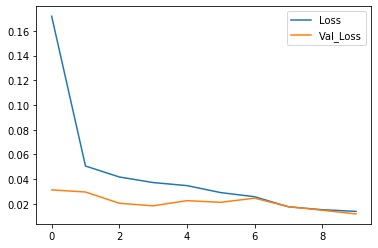

In [18]:
import matplotlib.pyplot as plt
plt.plot(model_1.history['loss'],label='Loss')
plt.plot(model_1.history['val_loss'],label='Val_Loss')
plt.legend()

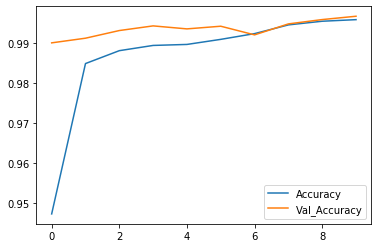

In [20]:
plt.plot(model_1.history['acc'],label='Accuracy')
plt.plot(model_1.history['val_acc'],label='Val_Accuracy')
plt.legend()

In [21]:
y_pre_test=model.predict(X_test)
y_pre_test=np.argmax(y_pre_test,axis=1)
y_test=np.argmax(y_test,axis=1)

**Plotting Confusion Matrix**

In [22]:
conf=confusion_matrix(y_test,y_pre_test)
conf=pd.DataFrame(conf,index=range(0,10),columns=range(0,10))
conf

,0,1,2,3,4,5,6,7,8,9
0,1170,7,0,0,0,0,0,0,0,0
1,1,1217,0,0,0,0,0,0,0,0
2,1,0,1222,1,0,0,0,0,0,0
3,1,1,0,1177,0,0,0,5,0,0
4,0,0,0,1,1218,2,0,0,0,0
5,0,0,0,1,0,1187,0,0,0,0
6,0,0,0,0,0,0,1165,3,0,1
7,0,0,0,2,0,0,1,1216,0,0
8,0,0,0,0,0,0,0,0,1186,0
9,2,0,0,0,0,0,7,2,0,1203


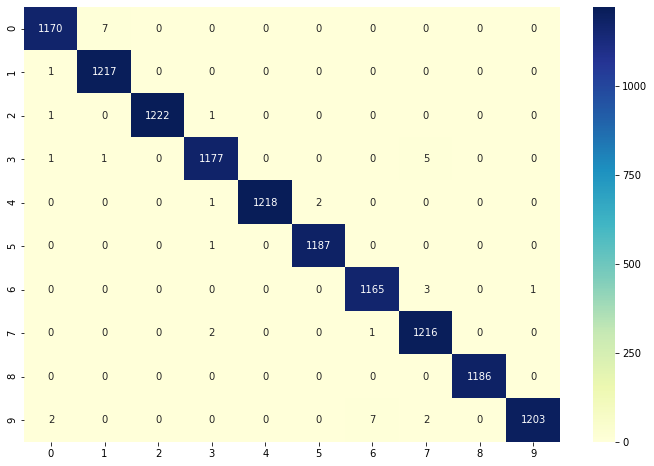

In [23]:
#Plotting confusion Matrix
plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf,annot=True, fmt="d",cmap="YlGnBu")

**Evaluating**

In [24]:
test=pd.read_csv('test.csv')

In [25]:
test_id=test.id

test=test.drop('id',axis=1)
test=test/255
test=test.values.reshape(-1,28,28,1)
test.shape

(5000, 28, 28, 1)

In [26]:
pred=model.predict(test)  
pred=np.argmax(pred,axis=1)

In [30]:
sample_sub.head() #sample_submission File

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7


In [28]:
sample_sub['label']=pred
sample_sub.to_csv('submission.csv',index=False)

In [31]:
sample_sub.head()

,id,label
0,0,3
1,1,0
2,2,2
3,3,6
4,4,7
